In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('nat_pokedex.csv')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df.fillna(value='none', inplace=True)
cols = df.columns.tolist()
# cols
# df.head()

### Important Information:
<sub>(Mythical and legendary status is debated 
and this data set uses the most recent and
most agreed upon definition of each for
the purpose of appropriate categorization.) </sub>

##### Mythical<sup>*1</sup>
- These are event-exclusive Pokémon that, with few exceptions, cannot be obtained during normal gameplay.
<!-- Note that mythical pokemon can be and have been permanently added to the core series content AFTER said event and maintain this tag. -->

##### Legendary<sup>*2</sup>
- These pokemon adhere to one or more of the following clauses, but not necessarily all:
<!--   GameFreak has not released an offcial definition of "Legendary" that neatly categorizes them. Instead they have opted to add the tag to specific pokemon that in general fall into one(but usually more) of the following criteria.   -->
  - Available only once per save file.
  - Unable to breed, with the exception of Manaphy.
  - 600 stat total
  - Unable to evolve
  - Appear either at the beginning(0 index) or end of their respective regional pokedex.
  - Genderless
  
##### Pseudo Legendary
- These pokemon, are distinctly not legendary and MUST have a 600 base stat total and one or more of the following criteria:
  - Able to be Be found more than once.
  - Evolve (With the exception of the Type: Null, Cosmog, and Kubfu line)
  - Breed.
  - Usually found at or around the end of the Pokédex when Legendaries and Mythicals are not included.
  - They are also part of a 3-stage Evolution.
  - They have genders
  
##### Form Changes
 - Many of the pokemon in this list have alternate "forms" that share the same ID as they are they same "species". Some of these forms are cosmetic and others affect type and stat totals. Where necessary we will ignore those forms and/or consider them a seperate pokemon.

In [4]:
# display starters, ignore megas and form changes
dex = df[['pokedex_number','name', 'type_1', 'type_2', 'generation', 'species']]
dex.groupby('pokedex_number').first().head(9)

,name,type_1,type_2,generation,species
pokedex_number,,,,,
1,Bulbasaur,Grass,Poison,1,Seed Pokémon
2,Ivysaur,Grass,Poison,1,Seed Pokémon
3,Venusaur,Grass,Poison,1,Seed Pokémon
4,Charmander,Fire,none,1,Lizard Pokémon
5,Charmeleon,Fire,none,1,Flame Pokémon
6,Charizard,Fire,Flying,1,Flame Pokémon
7,Squirtle,Water,none,1,Tiny Turtle Pokémon
8,Wartortle,Water,none,1,Turtle Pokémon
9,Blastoise,Water,none,1,Shellfish Pokémon


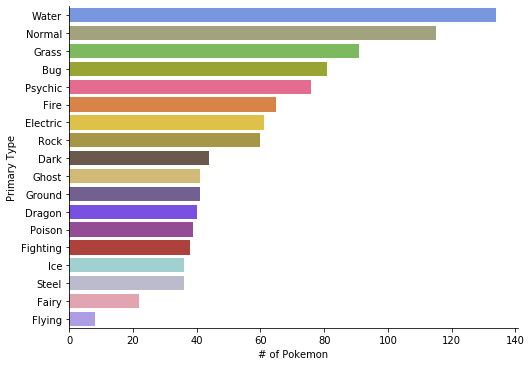

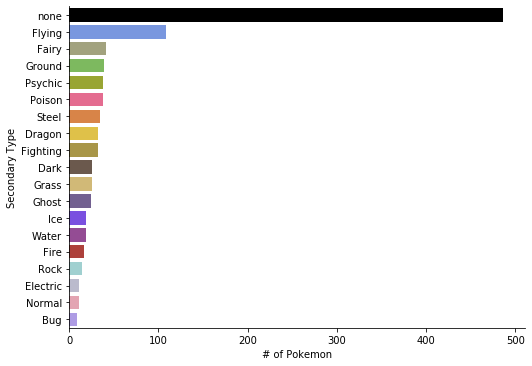

In [5]:
colors = [
                '#6890F0',  # Water
                '#A8A878',  # Normal
                '#78C850',  # Grass
                '#A8B820',  # Bug
                '#F85888',  # Psychic
                '#F08030',  # Fire
                '#F8D030',  # Electric
                '#B8A038',  # Rock
                '#705848',  # Dark
                '#E0C068',  # Ground
                '#705898',  # Ghost
                '#7038F8',  # Dragon
                '#A040A0',  # Poison
                '#C03028',  # Fighting
                '#98D8D8',  # Ice
                '#B8B8D0',  # Steel
                '#EE99AC',  # Fairy
                '#A890F0',  # Flying
                   ]
sns.catplot(
    y='type_1',
    data=dex,
    kind='count',
    order=dex['type_1'].value_counts().index,
    aspect=1.5,
    palette=colors
).set_axis_labels('# of Pokemon', 'Primary Type')

colors2 =['#000000'] + colors
sns.catplot(
    y='type_2',
    data=dex,
    kind='count',
    order=dex['type_2'].value_counts().index,
    aspect=1.5,
    palette=colors2
).set_axis_labels('# of Pokemon', 'Secondary Type')
# print(colors2)

### From these graphs we can conclude:
- The most prominent Primary pokemon type is Water and least is Flying
- Most Pokemon are singularyly typed

In [6]:
#all starter pokemon have on of these 3 abilites
array = ['Blaze', 'Overgrow', 'Torrent']
starters = df.loc[df['ability_1'].isin(array)]
starters = starters.drop(['german_name', 'japanese_name', 'generation', 'species', 'Unnamed: 52', 'is_sub_legendary', 'is_legendary', 'is_mythical', 'type_number', 'height_m', 'weight_kg', 'abilities_number', 'ability_2', 'ability_hidden', 'catch_rate', 'base_friendship', 'growth_rate', 'egg_type_number', 'egg_type_1', 'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal', 'against_normal', 'against_fire', 'against_water', 'against_electric', 'against_grass', 'against_ice', 'against_fight', 'against_poison', 'against_ground', 'against_flying', 'against_psychic', 'against_bug', 'against_rock', 'against_ghost', 'against_dragon', 'against_dark', 'against_steel', 'against_fairy'], axis=1)
starters
# df.groupby('generation')

,pokedex_number,name,type_1,type_2,ability_1,total_points,hp,attack,defense,sp_attack,sp_defense,speed,base_experience
0,1,Bulbasaur,Grass,Poison,Overgrow,318.0,45.0,49.0,49.0,65.0,65.0,45.0,64
1,2,Ivysaur,Grass,Poison,Overgrow,405.0,60.0,62.0,63.0,80.0,80.0,60.0,142
2,3,Venusaur,Grass,Poison,Overgrow,525.0,80.0,82.0,83.0,100.0,100.0,80.0,236
4,4,Charmander,Fire,none,Blaze,309.0,39.0,52.0,43.0,60.0,50.0,65.0,62
5,5,Charmeleon,Fire,none,Blaze,405.0,58.0,64.0,58.0,80.0,65.0,80.0,142
6,6,Charizard,Fire,Flying,Blaze,534.0,78.0,84.0,78.0,109.0,85.0,100.0,240
9,7,Squirtle,Water,none,Torrent,314.0,44.0,48.0,65.0,50.0,64.0,43.0,63
10,8,Wartortle,Water,none,Torrent,405.0,59.0,63.0,80.0,65.0,80.0,58.0,142
11,9,Blastoise,Water,none,Torrent,530.0,79.0,83.0,100.0,85.0,105.0,78.0,239
192,152,Chikorita,Grass,none,Overgrow,318.0,45.0,49.0,65.0,49.0,65.0,45.0,64


In [7]:
starters.sort_values('total_points', ascending=False).head(6)
# Swampert

,pokedex_number,name,type_1,type_2,ability_1,total_points,hp,attack,defense,sp_attack,sp_defense,speed,base_experience
309,260,Swampert,Water,Ground,Torrent,535.0,100.0,110.0,90.0,85.0,90.0,60.0,241
761,655,Delphox,Fire,Psychic,Blaze,534.0,75.0,69.0,72.0,114.0,100.0,104.0,240
197,157,Typhlosion,Fire,none,Blaze,534.0,78.0,84.0,78.0,109.0,85.0,100.0,240
6,6,Charizard,Fire,Flying,Blaze,534.0,78.0,84.0,78.0,109.0,85.0,100.0,240
469,392,Infernape,Fire,Fighting,Blaze,534.0,76.0,104.0,71.0,104.0,71.0,108.0,240
764,658,Greninja,Water,Dark,Torrent,530.0,72.0,95.0,67.0,103.0,71.0,122.0,239


In [8]:
df = df.drop(['german_name', 'japanese_name', 'generation', 'species', 'Unnamed: 52', 'is_sub_legendary', 'is_legendary', 'is_mythical', 'type_number', 'height_m', 'weight_kg', 'abilities_number', 'ability_2', 'ability_hidden', 'catch_rate', 'base_friendship', 'growth_rate', 'egg_type_number', 'egg_type_1', 'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal', 'against_normal', 'against_fire', 'against_water', 'against_electric', 'against_grass', 'against_ice', 'against_fight', 'against_poison', 'against_ground', 'against_flying', 'against_psychic', 'against_bug', 'against_rock', 'against_ghost', 'against_dragon', 'against_dark', 'against_steel', 'against_fairy'], axis=1)

df.sort_values('total_points', ascending=False).head(6)


,pokedex_number,name,type_1,type_2,ability_1,total_points,hp,attack,defense,sp_attack,sp_defense,speed,base_experience
1027,890,Eternatus Eternamax,Poison,Dragon,none,1125.0,255.0,115.0,250.0,125.0,250.0,130.0,none
190,150,Mega Mewtwo Y,Psychic,none,Insomnia,780.0,106.0,150.0,70.0,194.0,120.0,140.0,351
189,150,Mega Mewtwo X,Psychic,Fighting,Steadfast,780.0,106.0,190.0,100.0,154.0,100.0,130.0,351
458,384,Mega Rayquaza,Dragon,Flying,Delta Stream,780.0,105.0,180.0,100.0,180.0,100.0,115.0,351
456,383,Primal Groudon,Ground,Fire,Desolate Land,770.0,100.0,180.0,160.0,150.0,90.0,90.0,347
454,382,Primal Kyogre,Water,none,Primordial Sea,770.0,100.0,150.0,90.0,180.0,160.0,90.0,347


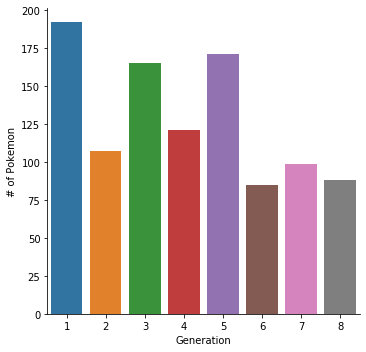

In [9]:
sns.catplot(
    x='generation', 
    data=dex, 
    kind='count'
).set_axis_labels('Generation', '# of Pokemon');

### Questions Answerd:
###### What is the most common singly typed pokemon type(type_1?
- Water, followed most closely by normal

###### What is the most common secondary pokemon type(type_2)?<sup>*</sup>
- Flying

###### Which Generation Introduced the most pokemon?
- Generation 1, followed by 5 and then 3

###### Which starter pokemon(including evolutions) has the highest base total?
- Swampert with a base of 535, closely followed by Delphox,  Typhlosion, Charizard, and Infernape, all tied with a base of 534

###### Which pokemon has the highest base total of all(including forms and evolutions)?
- Eternatus: Eternamax Form, followed by the X and Y forms of Mew-Two
     - from this we can also conclude that the strongest pokemon, or at least those with the highest totals are from form changes.